# Numpy
http://www.numpy.org/

# Scipy
http://www.scipy.org/

# Astropy
http://www.astropy.org/

# Matplotlib

## Pandas


Examples from [gully](https://github.com/gully)
* https://github.com/BrownDwarf/ApJdataFrames

From https://github.com/jonathansick/awesome-astronomy
- [AplPy](http://aplpy.github.io) - a Python module for astronomical imaging data.
- [Astropy](http://astropy.org) - Core package for Astronomy in Python.
- [AstroML](http://www.astroml.org) - Companion textbook *Statistics, Data Mining, and Machine Learning in Astronomy*.
- [Emcee](http://dan.iel.fm/emcee/current/) - Seriously kick-ass MCMC.
- [GalPy](https://github.com/jobovy/galpy) - Galactic Dynamics in python.
- [The LSST Stack](https://confluence.lsstcorp.org/display/LSWUG/Using+the+LSST+Stack) Conda-installable codes for working with LSST simulation data and some existing data.
- pyephem
- Multiprocessing
- Cython
- argparser ...

# Organize data

## numpy.ndarray
    simple but powerful
## numpy.ma.MaskedArray
    ndarray with mask
## astropy.table
    specifically designed for astro table
## pandas.DataFrame
    good at data clearning, suitable for collect and clean data from real life

# Basic about numpy.ndarray

In [1]:
a = [1,2,3]
b = a + 1

TypeError: can only concatenate list (not "int") to list

In [2]:
import numpy as np
a = np.array([1,2,3])
a + 1

array([2, 3, 4])

In [3]:
a = np.arange(0,10,0.5)
print(a)
print(a.dtype)
print(np.sin(a))
print(np.mean(a))

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]
float64
[ 0.          0.47942554  0.84147098  0.99749499  0.90929743  0.59847214
  0.14112001 -0.35078323 -0.7568025  -0.97753012 -0.95892427 -0.70554033
 -0.2794155   0.21511999  0.6569866   0.93799998  0.98935825  0.79848711
  0.41211849 -0.07515112]
4.75


In [10]:
a>3

array([False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [11]:
a[a>3]

array([3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [12]:
np.where(a>3)

(array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),)

In [13]:
a[np.where(a>3)]

array([3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [14]:
a[(a>3)&(a<4)], a[np.logical_and(a>3, a<4)]

(array([3.5]), array([3.5]))

In [16]:
print(a)
b = a.astype(np.int)
print(b)
print(b.dtype)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]
[0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9]
int64


In [18]:
b.dtype = np.float64 # be careful when changing dtype
print(b)

[0.0e+000 0.0e+000 4.9e-324 4.9e-324 9.9e-324 9.9e-324 1.5e-323 1.5e-323
 2.0e-323 2.0e-323 2.5e-323 2.5e-323 3.0e-323 3.0e-323 3.5e-323 3.5e-323
 4.0e-323 4.0e-323 4.4e-323 4.4e-323]


In [22]:
a = np.arange(24).reshape((2,3,4))
print(a.shape)
print(a)

(2, 3, 4)
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


In [23]:
print(a[:,1:2,2])
print('')
print(a[0,:,1])
print('')
print(a[:])

[[ 6]
 [18]]

[1 5 9]

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


In [28]:
import random
dataHeaders = " id  x     y ra     dec".split()
dataTypes   = "U20 i8 int16 f8 float16".split()
print(dataHeaders)
print(dataTypes)
todo = [(header, type) for header, type in zip(dataHeaders, dataTypes)]
dataType = np.dtype(todo)
print(todo)

# generate data to read
outputList = []
for i in range(10):
    outputList.append("{:10} {:10d} {:10d} {:10f} {:10f}". # format is more advanced than %
        format(np.random.randint(9999),
               np.random.randint(9999),
               np.random.randint(9999),
               np.random.rand(),
               np.random.rand()))
with open('./temp.dat', 'w') as f:
    f.write('\n'.join(outputList))

['id', 'x', 'y', 'ra', 'dec']
['U20', 'i8', 'int16', 'f8', 'float16']
[('id', 'U20'), ('x', 'i8'), ('y', 'int16'), ('ra', 'f8'), ('dec', 'float16')]


In [29]:
cat ./temp.dat


       107       7716        847   0.345188   0.016641
      2100       6384       9971   0.969953   0.834959
      6413       1514       1940   0.828885   0.826602
      4240       3817       5633   0.124147   0.257443
      4882       2150       3327   0.503724   0.873650
      2935       5088       9724   0.550332   0.325609
      4825       8018       1202   0.128692   0.049957
      9148       6307       4168   0.410860   0.009358
      9192       5360       4120   0.180746   0.936286
      1650       5513       2838   0.899948   0.589708

In [30]:
# load it use np.loadtxt
data = np.loadtxt('./temp.dat', dtype=dataType)
data

array([('107', 7716,  847, 0.345188, 0.01665),
       ('2100', 6384, 9971, 0.969953, 0.835  ),
       ('6413', 1514, 1940, 0.828885, 0.8267 ),
       ('4240', 3817, 5633, 0.124147, 0.2573 ),
       ('4882', 2150, 3327, 0.503724, 0.8735 ),
       ('2935', 5088, 9724, 0.550332, 0.3257 ),
       ('4825', 8018, 1202, 0.128692, 0.04996),
       ('9148', 6307, 4168, 0.41086 , 0.00936),
       ('9192', 5360, 4120, 0.180746, 0.9365 ),
       ('1650', 5513, 2838, 0.899948, 0.59   )],
      dtype=[('id', '<U20'), ('x', '<i8'), ('y', '<i2'), ('ra', '<f8'), ('dec', '<f2')])

In [38]:
import pprint
# load it manually
dataList = []
with open('./temp.dat') as f:
    for eachline in f:
        eachRow = tuple(eachline.split())
        dataList.append(eachRow)
pprint.pprint(dataList)

data = np.array(dataList, dtype=dataType)
data

[('107', '7716', '847', '0.345188', '0.016641'),
 ('2100', '6384', '9971', '0.969953', '0.834959'),
 ('6413', '1514', '1940', '0.828885', '0.826602'),
 ('4240', '3817', '5633', '0.124147', '0.257443'),
 ('4882', '2150', '3327', '0.503724', '0.873650'),
 ('2935', '5088', '9724', '0.550332', '0.325609'),
 ('4825', '8018', '1202', '0.128692', '0.049957'),
 ('9148', '6307', '4168', '0.410860', '0.009358'),
 ('9192', '5360', '4120', '0.180746', '0.936286'),
 ('1650', '5513', '2838', '0.899948', '0.589708')]


ValueError: could not assign tuple of length 5 to structure with 2 fields.

In [39]:
data[0]

('107', 7716, 847, 0.345188, 0.01665)

In [41]:
rawData = [
    ('list', [1,2,3]),
    ('dict', {1:1, 2:2}),
    ('tuple', (1,2,3)),
    ('another ndarray', np.array([1,2,3,4])),
    ('any thing', np),
]

newData = np.array(rawData, dtype=dataType)
newData

array([('list', list([1, 2, 3])), ('dict', {1: 1, 2: 2}),
       ('tuple', (1, 2, 3)), ('another ndarray', array([1, 2, 3, 4])),
       ('any thing', <module 'numpy' from '/Users/jjc/anaconda3/lib/python3.7/site-packages/numpy/__init__.py'>)],
      dtype=[('id', '<U20'), ('obj', 'O')])

In [42]:
print(newData['id'])
print(newData['obj'])

['list' 'dict' 'tuple' 'another ndarray' 'any thing']
[list([1, 2, 3]) {1: 1, 2: 2} (1, 2, 3) array([1, 2, 3, 4])
 <module 'numpy' from '/Users/jjc/anaconda3/lib/python3.7/site-packages/numpy/__init__.py'>]


# Cautions about python3, encoding

In [49]:
a = '你好'
b = u'你好'
c = a.encode('utf-8')
print(a)
print(b)
print(c)
print((a,b,c,c.decode('utf-8')))

你好
你好
b'\xe4\xbd\xa0\xe5\xa5\xbd'
('你好', '你好', b'\xe4\xbd\xa0\xe5\xa5\xbd', '你好')


# Debug

    import pdb
    pdb.set_trace()

    import ipdb
    ipdb.set_trace()

In [ ]:
import pdb
a = 1
print(a)
pdb.set_trace()
print(a + 1)

1
--Return--
> <ipython-input-1-87eee85afb7f>(4)<module>()->None
-> pdb.set_trace()
(Pdb) 


# freestyle to learn python package

* document (tutorial, example, gallery)
* jupyter + notebook or ipython
* make your own notes or snippets

# Dealing with FITS
Flexible Image Transport System

In [4]:
from astropy.io import fits
hdul = fits.open('B0950+08_gl98_408.fits')
print(hdul.info())

Filename: B0950+08_gl98_408.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      64   ()      
  1  HISTORY       1 BinTableHDU     71   1R x 28C   [24A, 256A, 8A, 8A, 1J, 1I, 1I, 1I, 1D, 1D, 1J, 1D, 1D, 1D, 1I, 1I, 1I, 1I, 1I, 32A, 32A, 32A, 256A, 32A, 32A, 1I, 32A, 1I]   
  2  SUBINT        1 BinTableHDU     72   1R x 11C   [1D, 1D, 1D, 1D, 1D, 1D, D, E, 4E, 4E, 1872I]   
None


In [5]:
print(hdul[0].header)

SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                    8 / number of bits per data pixel                  NAXIS   =                    0 / number of data axes                            EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy andCOMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.COMMENT   Contact the NASA Science Office of Standards and Technology for the   COMMENT   FITS Definition document #100 and other FITS information.             HDRVER  = '5.4             '   / Header version                                 FITSTYPE= 'PSRFITS         '   / FITS definition for pulsar data files          DATE    = '                '   / File cr

In [8]:
print(hdul['PRIMARY'].header['TELESCOP']) # get one item in primary header

lovell


In [13]:
print(hdul[2].columns)

ColDefs(
    name = 'INDEXVAL'; format = '1D'
    name = 'TSUBINT'; format = '1D'; unit = 's'
    name = 'OFFS_SUB'; format = '1D'; unit = 's'
    name = 'PERIOD'; format = '1D'; unit = 's'
    name = 'AUX_DM'; format = '1D'; unit = 'CM-3'
    name = 'AUX_RM'; format = '1D'; unit = 'RAD'
    name = 'DAT_FREQ'; format = 'D'; unit = 'MHz'
    name = 'DAT_WTS'; format = 'E'
    name = 'DAT_OFFS'; format = '4E'
    name = 'DAT_SCL'; format = '4E'
    name = 'DATA'; format = '1872I'; unit = 'Jy'; dim = '(468,1,4)'
)


In [15]:
dat_freq = hdul[2].data['DAT_FREQ']
print(dat_freq)

[408.]


In [20]:
print(hdul[2].header['POL_TYPE'])
data = hdul[2].data['DATA']
print(data.shape)

IQUV
(1, 4, 1, 468)


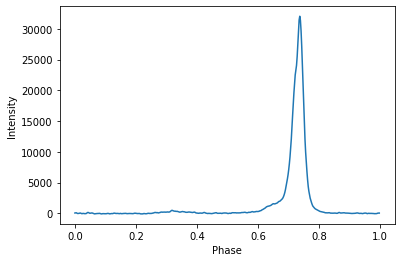

In [37]:
import numpy as np
import matplotlib.pyplot as plt
dat_scl = hdul[2].data['DAT_SCL']
dat_offs = hdul[2].data['DAT_OFFS']
stokes_i = data[0, 0, 0]*dat_scl[0, 0] + dat_offs[0, 0]
phase = np.linspace(0, 1, len(stokes_i), endpoint=False)
plt.plot(phase, stokes_i) # let's plot the Stokes I
plt.xlabel('Phase')
plt.ylabel('Intensity')
plt.show()
plt.close()

# homework2
* before doing this homework, you should
    * learn to use numpy and pandas to parse tables files
    * learn to use astropy

```
    modify your VariableStar, now you can use pandas to parse the file

    use matplotlib
    add function "plot" into class VariableStar, so
        I can use someSpecificVariableStar.plot() to get a beautiful plot of time v.s. all bands
        I need the sticks of the x axis to be in format of 2014-11-23T10:23:10

    use astropy
    add function "plotInMJD"
        make a plot the same as in function "plot", except that the x axis is MJD

    add function "getRaDec"
        return (ra, dec) of the star
    add function "getLB"
        return the galactic coordinates of the star

    add another function of your like...
        for example, you can write a function to get the median value of magnitude of all the bands

    write Docs

    write a Demo to show that all the requirements are satisfied
```